<b>Problem Statement</b>

Every year a large company loses 15% of its employees. 

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
<br>
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

<b>Explanation Problem</b>
<ol>What factors they should focus on, in order to curb attrition.
    In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay.</ol> 
    <ol>Also, they want to know which of these variables is most important and needs to be addressed right away.</ol>

<b>Process outline</b><br>
<ol>Perform exploratory data analysis<br> 
<ol>Random Foreset to select highest feature importances<br> 
<ol>Gridsearch for hyperparameter tuning in Random Forest Classifier <br>
<ol>Logistic Regression/Naive Bayes models </ol>

In [1096]:
#Importing relevant libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [1134]:
data = pd.read_csv('/Users/mac/Downloads/Atrition Dataset /datasets-42363-72602-general_data.csv',sep=',')

In [1135]:
data.shape

(4410, 24)

In [1136]:
pd.set_option('display.max_columns',999)

In [1137]:
data.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,4,Research Director,Married,40710,3.0,Y,13,8,0,28.0,5,7,7,7
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,2,Sales Executive,Single,58130,2.0,Y,20,8,1,5.0,2,0,0,0
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,2,Sales Executive,Married,31430,2.0,Y,22,8,3,10.0,2,0,0,0
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,3,Laboratory Technician,Married,20440,0.0,Y,21,8,0,10.0,2,9,7,8
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,4,Laboratory Technician,Divorced,134640,1.0,Y,13,8,1,6.0,2,6,1,5


In [1138]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [1139]:
#Checking number of unique values 
print(str(data.BusinessTravel.nunique()) + " number of unique values in Business Travel")
print(str(data.Department.nunique()) + " number of unique values in Department")
print(str(data.EducationField.nunique()) + " number of unique values in Education")
print(str(data.EmployeeID.nunique()) + " number of unique employee IDs")
print(str(data.Over18.nunique()) + " number of unique values in over 18")
print(str(data.StandardHours.nunique()) + " number of standard hours")

3 number of unique values in Business Travel
3 number of unique values in Department
6 number of unique values in Education
4410 number of unique employee IDs
1 number of unique values in over 18
1 number of standard hours


<b>Intuition</b><br>
Now we can dummify the columns Business Travel and Department

In [1140]:
#Checking stats for the categorical variables 
data.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
count,4410,4410,4410,4410,4410,4410,4410,4410
unique,2,3,3,6,2,9,3,1
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y
freq,3699,3129,2883,1818,2646,978,2019,4410


In [1141]:
print(data.JobRole.unique())

['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']


In [1142]:
##Checking the numerical vars
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


<h2>Intuiton</h2>

<b>Age Var</b><br>
The average age in the company is 36, Oldest person is 60, youngest is 18 <br>

<b>Distance</b><br>
Average distance of the workers from office is 9km, least is 1km and maximum is 29km <br>

<b>Salary</b>
Av salary 65.000, minimum salary 10.000, max salary 199.000

<b>Point notice</b><br>
We'll visualize the rest of during the exploratory data analysis

In [1143]:
#Check for missing values
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [1144]:
#Imputing missing values 
data = data.fillna(data.median())

In [1145]:
data.isna().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [1146]:
data.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

In [1147]:
#Drop redundant columns from the dataset
data.drop(['EmployeeCount','EmployeeID','Over18','StandardHours'], axis=1, inplace=True)

In [1148]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [1149]:
#Covert to proper data types 
data['Attrition']=data['Attrition'].astype('category')
data['BusinessTravel']=data['BusinessTravel'].astype('category')
data['Department']=data['Department'].astype('category')
data['EducationField']=data['EducationField'].astype('category')
data['Gender']=data['Gender'].astype('category')
data['JobRole']=data['JobRole'].astype('category')
data['MaritalStatus']=data['MaritalStatus'].astype('category')
data['JobLevel'] = data['JobLevel'].astype('category')
data['Education']=data['Education'].astype('category')

In [1150]:
data['NumCompaniesWorked']=data['NumCompaniesWorked'].astype('int64')
data['TotalWorkingYears']= data['TotalWorkingYears'].astype('int64')

In [1151]:
data.dtypes

Age                           int64
Attrition                  category
BusinessTravel             category
Department                 category
DistanceFromHome              int64
Education                  category
EducationField             category
Gender                     category
JobLevel                   category
JobRole                    category
MaritalStatus              category
MonthlyIncome                 int64
NumCompaniesWorked            int64
PercentSalaryHike             int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
YearsAtCompany                int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
dtype: object

<b>Feature Engineering</b> 
1. We can create a bin for various ages and create a column tagged age group <br>
2. Distance divided into close denoted 1 and far denoted 0 <br>
3. We'll create a column new employee and old employee denoted 0 and 1 <br>

<b>First we'll need to visualize their independent contributions to choose binning parameters</b>

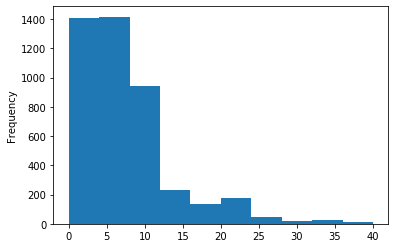

In [1152]:
data['YearsAtCompany'].plot.hist()

<b>Intuition</b><br>
Majority of the workers have been at the company for 7years

In [1153]:
#Seperating the years at company into New, Mid and Old workers 
bins = [0,8,12,41]
labels = ['New','Mid','Old']
data['VeteranCategory'] = pd.cut(data['YearsAtCompany'], bins=bins,labels=labels)

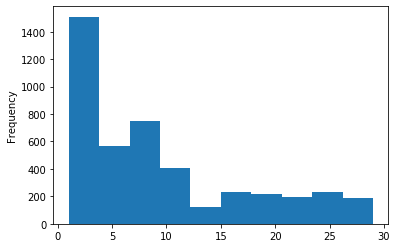

In [1154]:
data['DistanceFromHome'].plot.hist()

<b>Intuition</b><br>
Majority of the workers live within 8kms of the office<br>
We'll categorise them(within 8kms) under Close and the others under Far

In [1155]:
#Bining into Close and far 
bins = [0,9,30]
labels=['Close','Far']
data['ProximityfromOffice'] = pd.cut(data['DistanceFromHome'], bins=bins,labels=labels) 

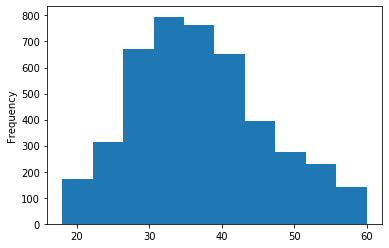

In [1156]:
data['Age'].plot.hist()

<b>Intuition</b><br>
Majority workers at the company are between 27 and 43

In [1157]:
bins = [15, 27, 47, 61]
labels = ['Young','Middle Aged','Elderly']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

In [1158]:
data.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,VeteranCategory,ProximityfromOffice,AgeGroup
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1,11,0,1,6,1,0,0,New,Close,Elderly
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0,23,1,6,3,5,1,4,New,Far,Middle Aged
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1,15,3,5,2,5,0,3,New,Far,Middle Aged


## Exploratory Data Analysis

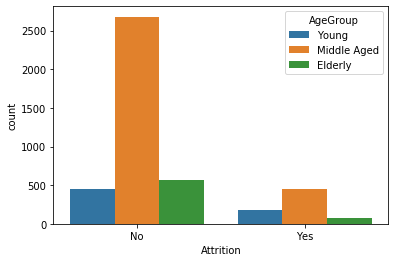

In [1159]:
sns.countplot(x = "Attrition",data=data,hue="AgeGroup")
plt.show()

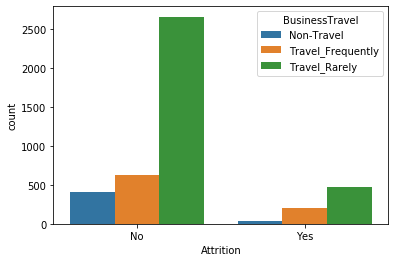

In [1160]:
sns.countplot(x='Attrition',data=data,hue='BusinessTravel')
plt.show()

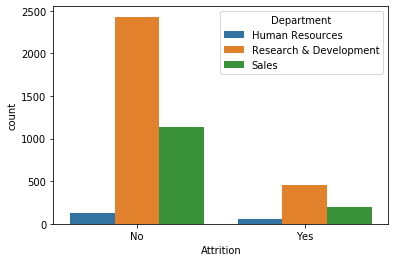

In [1161]:
sns.countplot(x='Attrition',data=data,hue='Department')
plt.show()

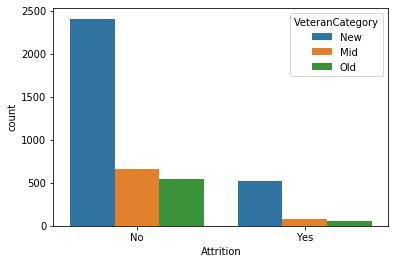

In [1162]:
sns.countplot(x='Attrition', data=data, hue='VeteranCategory')

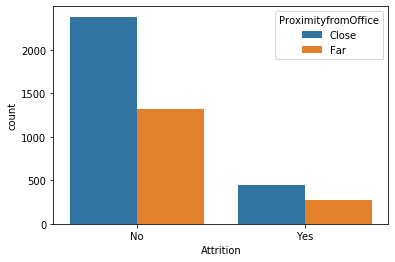

In [1163]:
sns.countplot(x='Attrition', data=data, hue='ProximityfromOffice')

<b>Target Distribution</b>

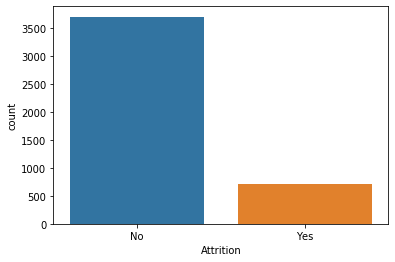

No     3699
Yes     711
Name: Attrition, dtype: int64


In [1164]:
# Plot Distribution
sns.countplot(x='Attrition',data=data)
plt.show()

# What are the counts?
print(data.Attrition.value_counts())

# What is the percentage?
count_yes = len(data[data.Attrition == 'yes'])
count_no = len(data[data.Attrition != 'yes'])

Target variable is imbalanced, hence we'll use f1score to measure model validity instead of accuracy

In [1165]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer

In [1166]:
data.drop('VeteranCategory', axis=1,inplace=True)

In [1167]:
data.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,ProximityfromOffice,AgeGroup
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1,11,0,1,6,1,0,0,Close,Elderly
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0,23,1,6,3,5,1,4,Far,Middle Aged
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1,15,3,5,2,5,0,3,Far,Middle Aged
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3,11,3,13,5,8,7,5,Close,Middle Aged
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4,12,2,9,2,6,0,4,Far,Middle Aged


In [1168]:
#initialising the labelencoder for our categorical columns
enc=LabelEncoder()

In [1169]:
for col in data.select_dtypes('category'):
    data[col]=enc.fit_transform(data[col])

In [1170]:
data.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,ProximityfromOffice,AgeGroup
0,51,0,2,2,6,1,1,0,0,0,1,131160,1,11,0,1,6,1,0,0,0,0
1,31,1,1,1,10,0,1,0,0,6,2,41890,0,23,1,6,3,5,1,4,1,1
2,32,0,1,1,17,3,4,1,3,7,1,193280,1,15,3,5,2,5,0,3,1,1
3,38,0,0,1,2,4,1,1,2,1,1,83210,3,11,3,13,5,8,7,5,0,1
4,32,0,2,1,10,0,3,1,0,7,2,23420,4,12,2,9,2,6,0,4,1,1


In [1172]:
for col in ['Attrition','BusinessTravel','Department','Education','EducationField','Gender','JobLevel','JobRole','MaritalStatus','ProximityfromOffice','AgeGroup']:
    data[col]=data[col].astype('category', axis=1,inplace=True)

In [1174]:
from sklearn.model_selection import train_test_split 

In [1175]:
y= data['Attrition']
X= data.drop(['Attrition'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [1176]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3528, 21)
(882, 21)
(3528,)
(882,)


In [1177]:
num_attr = X_train.select_dtypes(['int64','float']).columns
print(num_attr)

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [1178]:
cat_attr = X_train.select_dtypes('category').columns
print(cat_attr)

Index(['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'ProximityfromOffice',
       'AgeGroup'],
      dtype='object')


In [1180]:
X_train.isna().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
ProximityfromOffice        0
AgeGroup                   0
dtype: int64

In [1181]:
X_test.isna().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
ProximityfromOffice        0
AgeGroup                   0
dtype: int64

In [1182]:
scaler = StandardScaler()
scaler.fit(X_train[num_attr])

StandardScaler()

In [1183]:
scaler.mean_

array([3.67721088e+01, 9.15079365e+00, 6.53566582e+04, 2.68877551e+00,
       1.51853741e+01, 7.90816327e-01, 1.11808390e+01, 2.81235828e+00,
       6.95691610e+00, 2.17715420e+00, 4.09240363e+00])

In [1184]:
X_train[num_attr]=scaler.transform(X_train[num_attr]) #standardize train and tst
X_test[num_attr]=scaler.transform(X_test[num_attr]) 

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [1186]:
print(X_train.shape)
print(X_test.shape)

(3528, 21)
(882, 21)


In [1187]:
X_train = pd.get_dummies(columns=cat_attr,data=X_train,drop_first=True)
X_test =pd.get_dummies(columns=cat_attr,data=X_test,drop_first=True)

In [1188]:
X_train.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_1,BusinessTravel_2,Department_1,Department_2,Education_1,Education_2,Education_3,Education_4,EducationField_1,EducationField_2,EducationField_3,EducationField_4,EducationField_5,Gender_1,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_1,MaritalStatus_2,ProximityfromOffice_1,AgeGroup_1,AgeGroup_2
3788,-0.738745,-1.009460,2.410464,-0.678311,-0.598154,1.416293,-0.152842,-0.630227,0.502931,1.194316,0.827646,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1915,0.133946,-0.637916,0.743423,-0.678311,2.138924,0.245013,-0.670584,-0.630227,-0.323420,-0.367761,-0.310952,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2324,0.133946,-0.885612,-0.344513,0.526665,1.044093,0.245013,-0.541149,0.145572,-0.323420,-0.367761,-0.026303,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1430,0.897551,-0.885612,0.811155,1.329982,-0.871862,1.416293,1.529818,-0.630227,1.990362,3.068809,1.112296,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4141,-0.847831,-1.009460,-0.476589,0.526665,-1.145570,-0.926267,-0.152842,1.697171,-0.488690,-0.680177,-0.310952,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0


In [1190]:
X_test.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_1,BusinessTravel_2,Department_1,Department_2,Education_1,Education_2,Education_3,Education_4,EducationField_1,EducationField_2,EducationField_3,EducationField_4,EducationField_5,Gender_1,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_1,MaritalStatus_2,ProximityfromOffice_1,AgeGroup_1,AgeGroup_2
33,-0.084227,-0.514068,-0.239318,0.526665,-0.324446,-0.926267,-0.152842,-0.630227,0.172391,1.506732,0.827646,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3246,0.897551,-0.885612,-0.097717,-1.079970,-0.324446,-0.926267,-0.282278,-0.630227,0.172391,0.257070,-0.880252,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3461,1.552069,1.715198,2.695783,2.534957,1.317801,-0.926267,0.882641,-0.630227,0.502931,-0.055346,0.827646,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
1863,1.115723,0.724413,0.003669,-1.079970,-0.050738,-0.926267,-0.411713,-0.630227,0.007120,1.506732,0.827646,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
3242,-0.302399,1.343653,-0.167565,0.125006,1.044093,0.245013,-0.541149,0.921372,-1.149771,-0.680177,-1.164901,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0


In [1191]:
from sklearn.ensemble import RandomForestClassifier

In [1217]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.metrics import mean_absolute_error

<b>Going in for feature selection with Random Forest feature importances</b>

In [1218]:
scores = {}

for n_estimators in range(2, 100):
    RF_model = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    RF_model.fit(X_train, y_train)
    RF_predictions = RF_model.predict(X_test)
    RF_mae = mean_absolute_error(RF_predictions, y_test)
    scores[n_estimators] = RF_mae

In [1219]:
best_n_estimators = []

for n_estimators, score in scores.items():
    if score == min(scores.values()):
        best_n_estimators.append(n_estimators)

print(f"Best Number of Estimators: {min(best_n_estimators)}")

Best Number of Estimators: 47


In [1220]:
from sklearn.metrics import classification_report, 

In [1221]:
rf_clf = RandomForestClassifier(n_estimators=min(best_n_estimators), random_state=0)

rf_clf.fit(X_train, y_train)
score_train = rf_clf.score(X_train, y_train)
print('Training Accuracy : ' + str(score_train))

score_valid = rf_clf.score(X_test, y_test)
print('Validation Accuracy : ' + str(score_valid))

print()
print(classification_report(y_test, rf_clf.predict(X_test)))

Training Accuracy : 1.0
Validation Accuracy : 0.9965986394557823

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       735
           1       1.00      0.98      0.99       147

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882



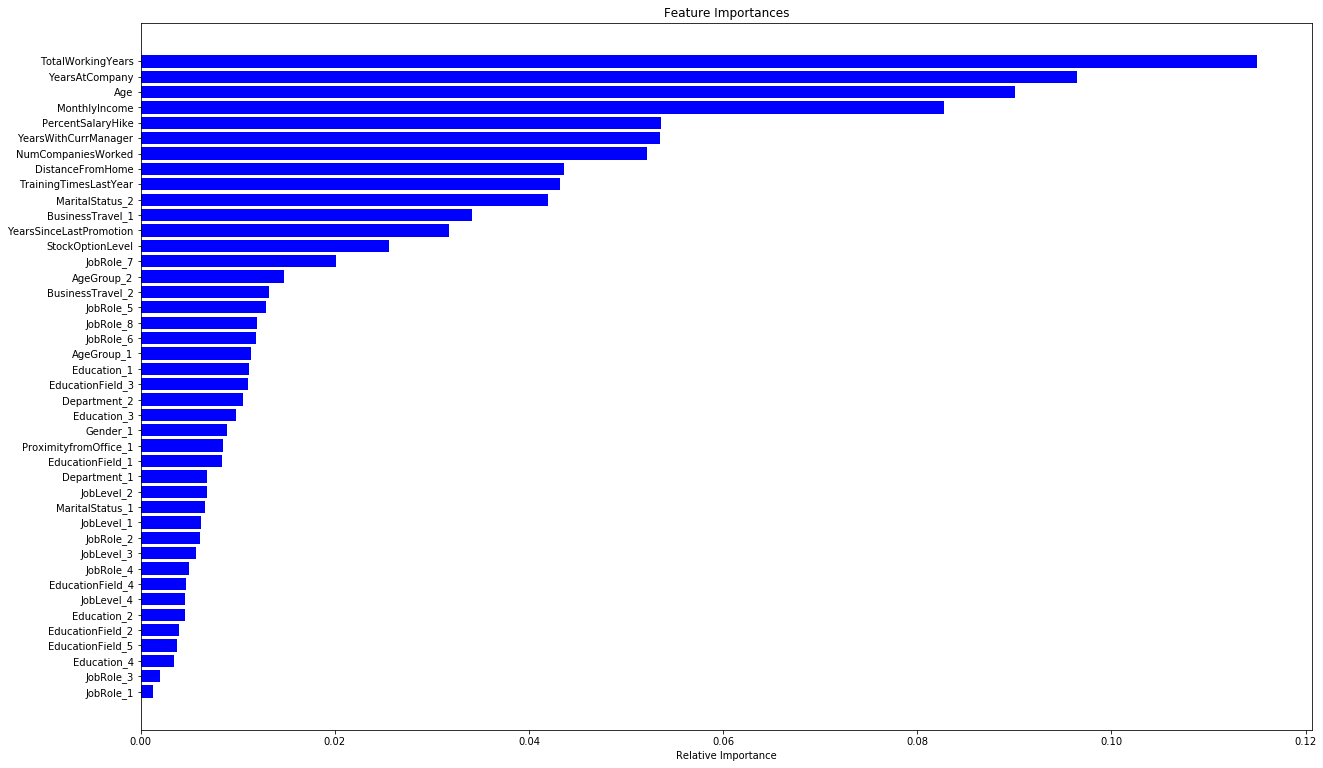

In [1238]:
import matplotlib.pyplot as plt 
%matplotlib inline 
features = X_train.columns 

fig, ax = plt.subplots(figsize=(21, 13))
plt.title('Feature Importances')
ax.barh(range(len(indices)), importances[indices],color='b')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

<b>Intuition</b><br>
We are using this as a feature selection technique by looking at the importance of features <br>
We're going to use the first <b>7 features</b> to proceed with our models<br>

In [1241]:
feature_importances = pd.DataFrame(rf_clf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances.head(7)

,index,importance
0,MonthlyIncome,0.090391
1,Age,0.090112
2,TotalWorkingYears,0.079845
3,YearsAtCompany,0.067922
4,PercentSalaryHike,0.059046
5,DistanceFromHome,0.053569
6,YearsWithCurrManager,0.051070


<b>These are the seven most important features the company needs to take a closer look at. </b><br>
    The attrition problem can be solved from here. 

## Data Reduction from metric

In [1243]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'ProximityfromOffice', 'AgeGroup'],
      dtype='object')

In [1250]:
data.drop(['BusinessTravel','Department','Education','EducationField','Gender','JobLevel','JobRole','MaritalStatus','NumCompaniesWorked','StockOptionLevel','TrainingTimesLastYear','ProximityfromOffice','AgeGroup'], axis=1,inplace=True)

,Age,Attrition,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,6,131160,11,1,1,0,0
1,31,1,10,41890,23,6,5,1,4
2,32,0,17,193280,15,5,5,0,3


In [1252]:
data.drop(['YearsSinceLastPromotion'],axis=1,inplace=True)

In [1253]:
data.head(4)

,Age,Attrition,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager
0,51,0,6,131160,11,1,1,0
1,31,1,10,41890,23,6,5,4
2,32,0,17,193280,15,5,5,3
3,38,0,2,83210,11,13,8,5


/Users/mac/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


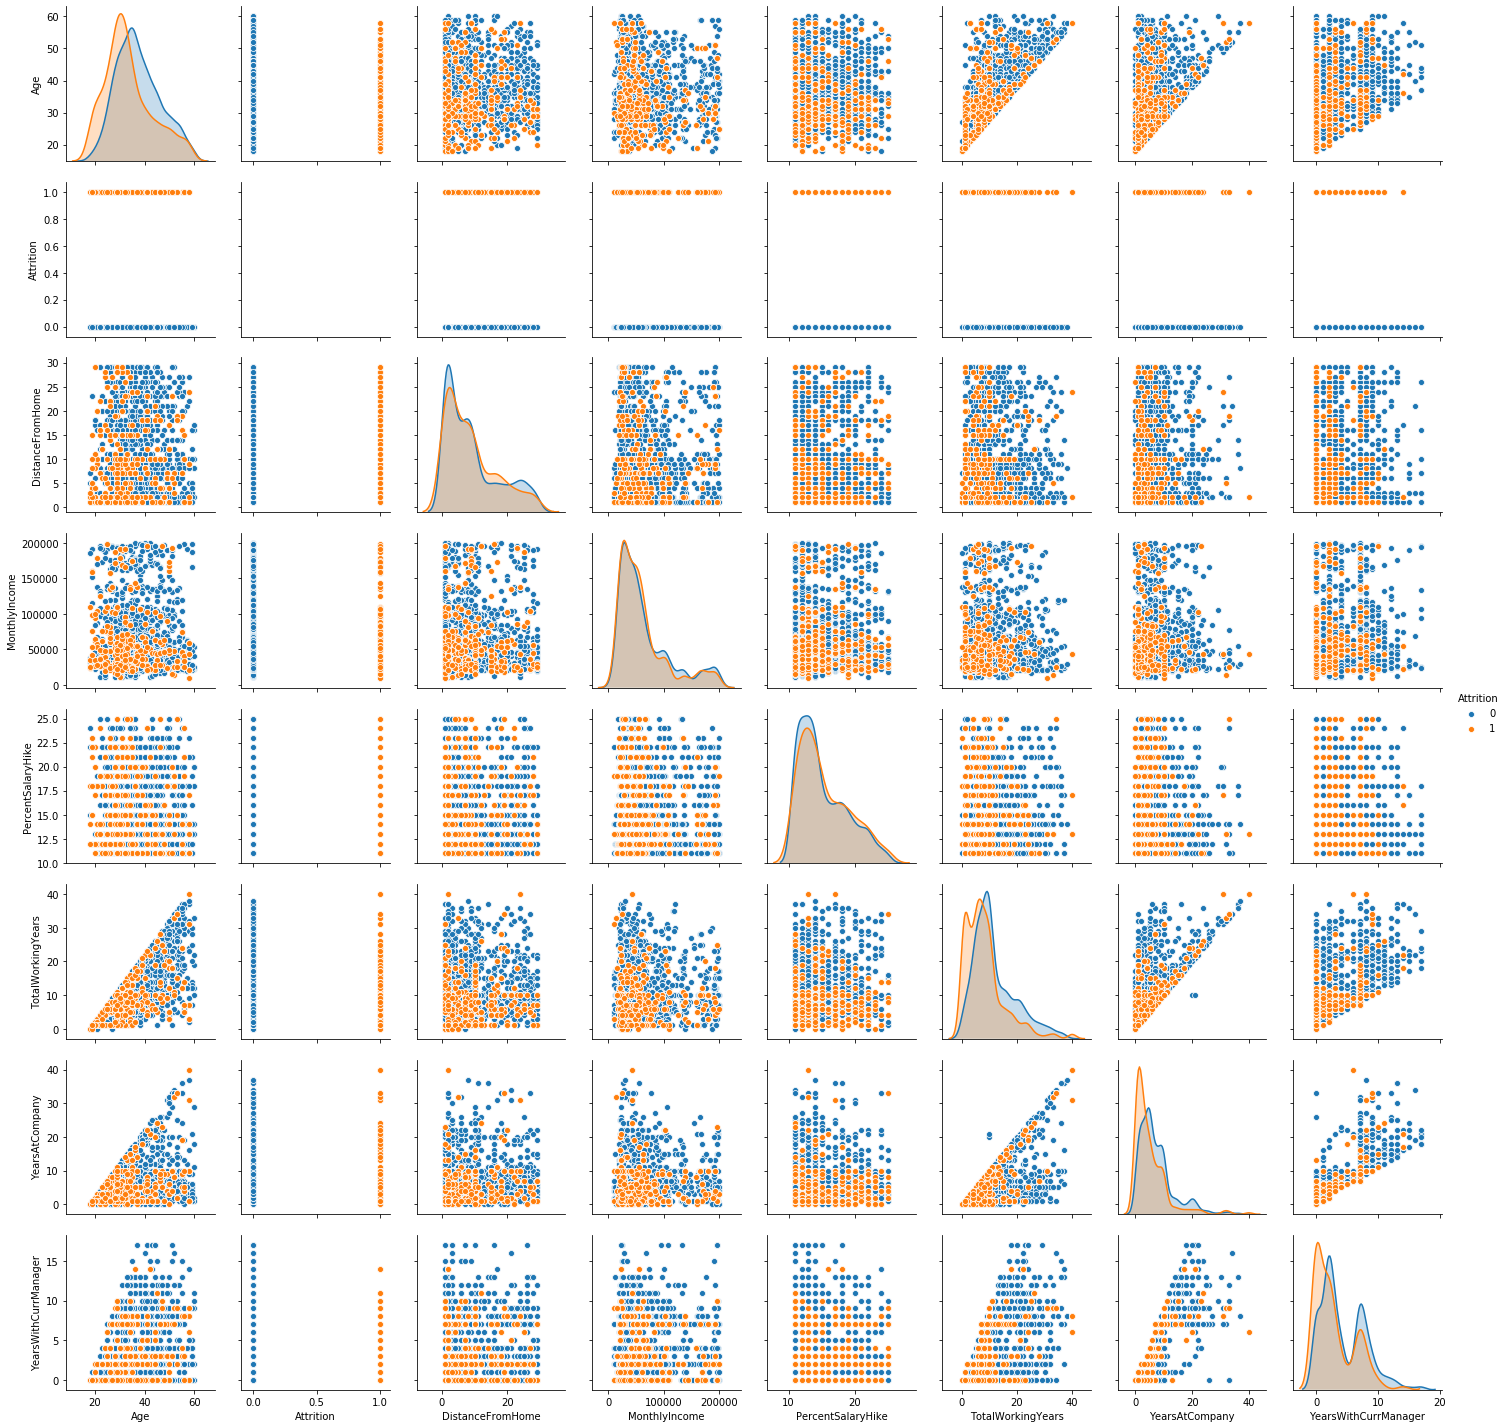

In [1264]:
sns.pairplot(data, hue='Attrition')

In [1257]:
data.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'MonthlyIncome',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsWithCurrManager'],
      dtype='object')

In [1260]:
corr = data[['Age', 'Attrition', 'DistanceFromHome', 'MonthlyIncome','PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany','YearsWithCurrManager']].corr()

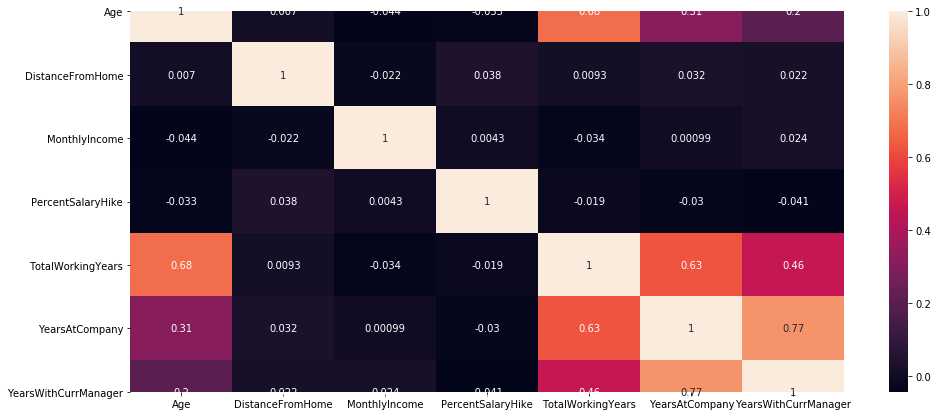

In [1261]:
plt.figure(figsize=(16,7))
sns.heatmap(corr,annot=True)
plt.show()

<b>Intuition</b><br>
Strong positive correlation between Age and Total Working Years at company. <br>
There are weaker positive relationships between Age and Years at company and Years with current manager.<br>
Of course there's a strong relationship between Total working years and Years at the company.<br>
Years with current manager and years at company have the strongest ever relationship, 

<b>Data Distribution</b>

In [1266]:
print(len(data))
print(len(data[data['Attrition']==1]))
print(len(data[data['Attrition']==0]))
print("percentage of yes Attrition is:",(len(data[data['Attrition']==1])/len(data))*100,"%")
print("percentage of no Attrition is:",(len(data[data['Attrition']==0])/len(data))*100,"%")

4410
711
3699
percentage of yes Attrition is: 16.122448979591837 %
percentage of no Attrition is: 83.87755102040816 %


In [1267]:
data.head(4)

,Age,Attrition,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager
0,51,0,6,131160,11,1,1,0
1,31,1,10,41890,23,6,5,4
2,32,0,17,193280,15,5,5,3
3,38,0,2,83210,11,13,8,5


In [1268]:
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [1269]:
data.dtypes

Age                        int64
Attrition               category
DistanceFromHome           int64
MonthlyIncome              int64
PercentSalaryHike          int64
TotalWorkingYears          int64
YearsAtCompany             int64
YearsWithCurrManager       int64
dtype: object

In [1270]:
cat_attr = data.select_dtypes('category')
num_attr = data.select_dtypes('int64')

<b>Logistic Regression Model</b>

In [1292]:
y= data['Attrition']
X= data.drop(['Attrition'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [1293]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [1294]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [1295]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8333333333333334
[[735   0]
 [147   0]]


In [1296]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       735
           1       0.00      0.00      0.00       147

    accuracy                           0.83       882
   macro avg       0.42      0.50      0.45       882
weighted avg       0.69      0.83      0.76       882



/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1297]:
#Creating K fold Cross-validation 
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lr, # model
                         X_train, # Feature matrix
                         y_train, # Target vector
                         cv=kf, # Cross-validation technique
                         scoring="accuracy", # Loss function
                         n_jobs=-1) # Use all CPU scores
print('10 fold CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

10 fold CV accuracy: 0.840 +/- 0.017


In [1298]:
from sklearn.model_selection import cross_val_predict
print('The cross validated score for Logistic Regression Classifier is:',round(scores.mean()*100,2))
y_pred = cross_val_predict(lr,X_train,y_train,cv=10)

The cross validated score for Logistic Regression Classifier is: 84.01


<b>Naive Bayes Model</b>

In [1326]:
from sklearn.preprocessing import QuantileTransformer

transformed = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(X_train))

In [1327]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB

pipeline = make_pipeline(QuantileTransformer(output_distribution='normal'), GaussianNB())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(output_distribution='normal')),
                ('gaussiannb', GaussianNB())])

In [1333]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=10).mean())
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

0.6900273778563252
Number of mislabeled points out of a total 882 points : 160
